In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("cancer patient data sets.csv")

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [12]:


df = df.drop_duplicates()


df = df.dropna() 

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:", list(cat_cols))

# Convert categorical columns to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Confirm all columns are numeric now
print("\nAfter Encoding:\n", df.dtypes)

Categorical Columns: ['Level']

After Encoding:
 index                       int64
Patient Id                  int64
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object


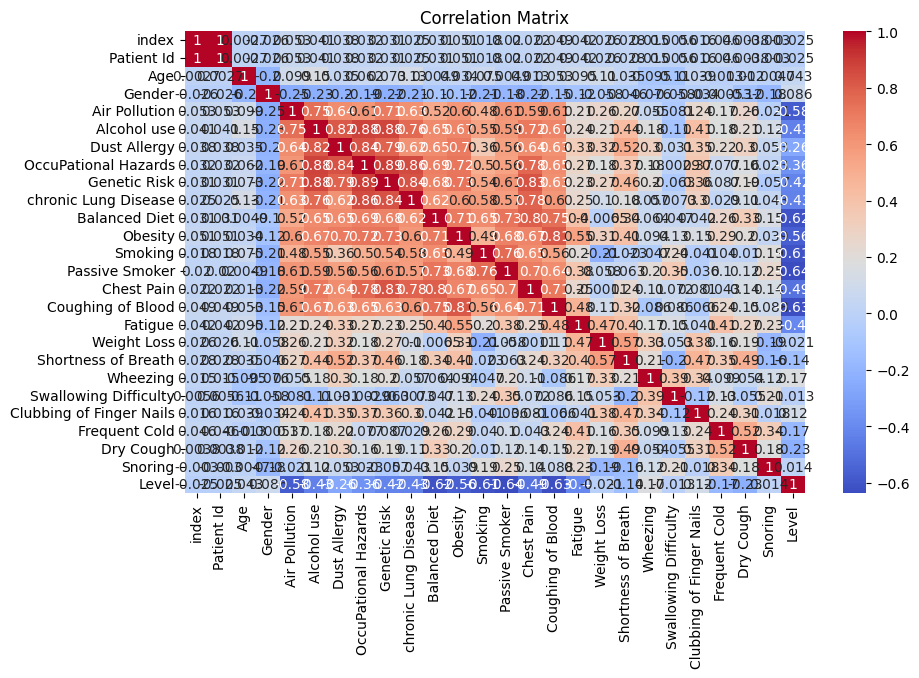


Feature correlation with target:
 Level                       1.000000
Passive Smoker              0.638409
Coughing of Blood           0.631118
Balanced Diet               0.618781
Smoking                     0.611087
Air Pollution               0.577269
Obesity                     0.561961
Chest Pain                  0.494704
Alcohol use                 0.434071
chronic Lung Disease        0.432405
Genetic Risk                0.423382
Fatigue                     0.403276
OccuPational Hazards        0.363748
Dust Allergy                0.264926
Dry Cough                   0.228720
Frequent Cold               0.171678
Wheezing                    0.167773
Shortness of Breath         0.140178
Clubbing of Finger Nails    0.116746
Gender                      0.086222
Age                         0.042631
Patient Id                  0.024556
index                       0.024556
Weight Loss                 0.020537
Snoring                     0.014280
Swallowing Difficulty       0.012880
Nam

In [14]:
# Correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Check feature correlation with target
corr_target = abs(corr['Level']).sort_values(ascending=False)
print("\nFeature correlation with target:\n", corr_target)

In [16]:
df.describe()

# Apply scaling if required
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Level', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Level']

print("\nScaling applied using StandardScaler.")


Scaling applied using StandardScaler.


In [17]:
# Split dataset: 80% train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further split training data into 70% train and 30% validation
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print(f"Training set: {X_train_final.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (560, 25), Validation set: (240, 25), Test set: (200, 25)


Validation Accuracy: 100.0 %
Test Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



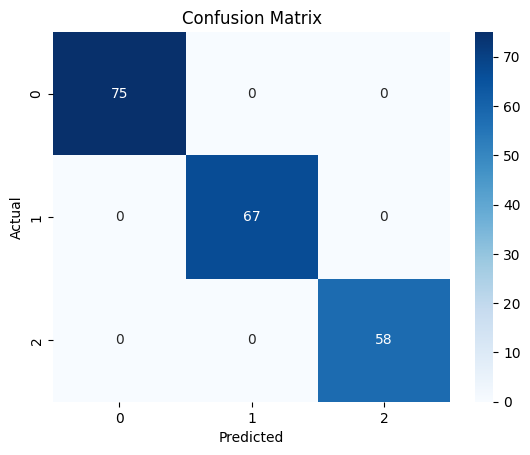

In [18]:
# Initialize and train Decision Tree
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_final, y_train_final)

# Evaluate on validation set
val_preds = model.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)

# Evaluate on test set
test_preds = model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Validation Accuracy:", round(val_acc*100, 2), "%")
print("Test Accuracy:", round(test_acc*100, 2), "%")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, test_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()